# Import data

In [81]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

In [82]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [83]:
X.shape

(1000, 2)

In [84]:
y.shape

(1000,)

# Load and split Data

In [85]:
X = torch.Tensor(X)
y = torch.Tensor(y)
print(y)

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 

In [86]:
train_ratio = 0.8
n_train = int(X.shape[0] * 0.8)
n_test = X.shape[0] - n_train
dataset = TensorDataset(X,y)
train, test = random_split(dataset, [n_train, n_test])

In [87]:
train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test, batch_size=32, shuffle=True)

In [88]:
one_x, one_y= next(iter(train_dataloader))
print(one_x, one_y)

tensor([[ 0.7783, -0.3260],
        [-1.3969,  0.4888],
        [ 1.8893, -0.1848],
        [ 0.7530, -0.4632],
        [ 1.8291,  0.2886],
        [ 0.3199,  0.9518],
        [ 1.9713, -0.1345],
        [ 1.6113, -0.2284],
        [-0.2387,  1.1462],
        [ 2.0255,  0.2855],
        [ 0.4119, -0.4126],
        [ 1.5716, -0.6940],
        [-0.6328,  0.7346],
        [ 1.8784, -0.3905],
        [-0.8027,  0.8041],
        [ 0.1127,  1.3438],
        [ 1.8477, -0.1820],
        [ 0.0039,  0.8753],
        [ 0.3389, -0.3830],
        [-1.0920, -0.2208],
        [-1.1308,  0.2710],
        [-1.1451,  0.3094],
        [ 1.5753, -0.4174],
        [ 0.8161, -0.0333],
        [ 0.5076,  0.9753],
        [ 0.9997,  0.4571],
        [ 1.7056,  0.5543],
        [ 0.9348,  0.4125],
        [ 0.5105,  1.3320],
        [ 0.9046,  0.2472],
        [ 0.3358,  0.0686],
        [ 0.5744,  0.9996]]) tensor([0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 0.,

# Visualize Data

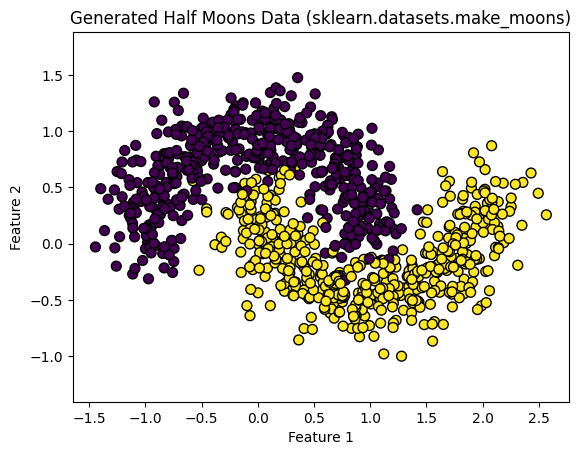

In [89]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Generated Half Moons Data (sklearn.datasets.make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal') # Optional: Ensures circles look like circles
plt.show()

In [90]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 10)
        self.linear2 = nn.Linear(10, 10)
        self.linear3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        return out

In [91]:
model = MLP()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

epoch 0, loss 7.6755523681640625
epoch 10, loss 1.5591784715652466
epoch 20, loss 0.7955408096313477
epoch 30, loss 0.8861806988716125
epoch 40, loss 0.7182241082191467
epoch 50, loss 1.1704938411712646
epoch 60, loss 0.37813422083854675
epoch 70, loss 0.48458534479141235
epoch 80, loss 1.2490507364273071
epoch 90, loss 1.1706202030181885


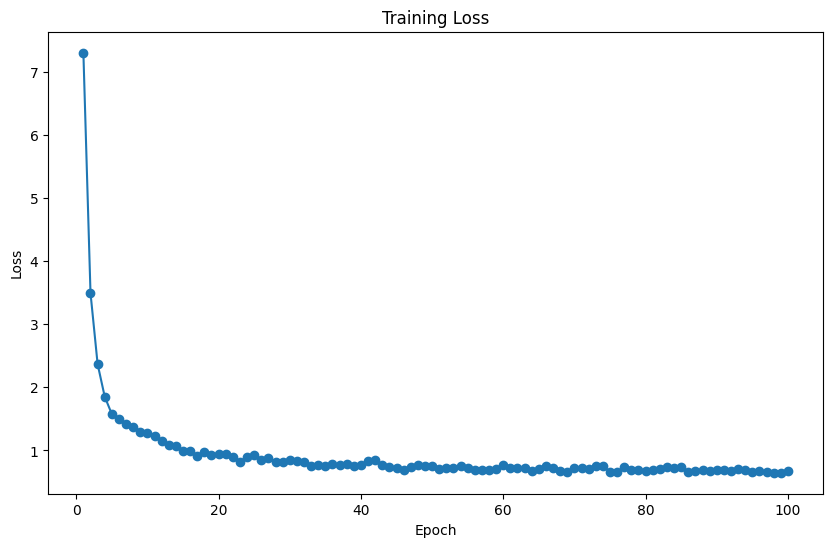

In [92]:
losses = []
n = len(train_dataloader)
n_epoch = 100
for epoch in range(n_epoch):
    model.train()
    epoch_loss = 0
    for input, output in train_dataloader:
        pred_y = model(input).squeeze()
        loss = criterion(pred_y, output)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / n)
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epoch + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


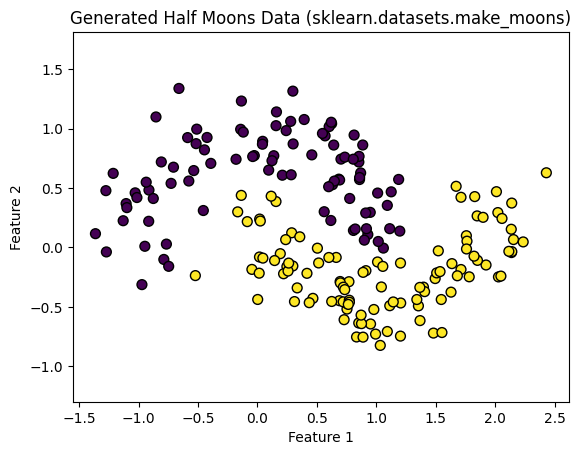

In [93]:
model.eval()
with torch.no_grad():
    for input, _ in test_dataloader:
        pred_y = torch.round(model(input)).detach().numpy()
        plt.scatter(input[:, 0], input[:, 1], c=pred_y, cmap='viridis',vmin=0, vmax=1,  marker='o', edgecolor='k', s=50)
plt.title("Generated Half Moons Data (sklearn.datasets.make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal') # Optional: Ensures circles look like circles
plt.show()